In [ ]:
import numpy as np
import pandas as pd
import numpy as np
from scipy.spatial.distance import mahalanobis
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.utils import shuffle

In [ ]:
# Assuming `data` is your 425x87 matrix and `labels` is a 1D array with class labels
class_MCI_data = pd.read_csv('/content/radiomic_features_mci_oct10.csv')#MCI data
class_NC_data = pd.read_csv('/content/radiomic_features_nc_oct10 .csv')  #NC Data

In [ ]:
# Function to extract numerical value from array-like string
def extract_number(array_string):
    if isinstance(array_string, str) and 'array' in array_string:
        return float(array_string.split('(')[1].split(')')[0])
    else:
        return array_string
# Apply the function to each column
for column in class_MCI_data.columns:
    class_MCI_data[column] = class_MCI_data[column].apply(extract_number)
for column in class_NC_data:
    class_NC_data[column] = class_NC_data[column].apply(extract_number)
mean_A = np.mean(class_MCI_data, axis=0)
mean_B = np.mean(class_NC_data, axis=0)
cov_matrix = np.cov(np.vstack((class_MCI_data, class_NC_data)).T)

# Invert the covariance matrix
inv_cov_matrix = np.linalg.inv(cov_matrix)

# Calculate Mahalanobis distance
mahal_dist = mahalanobis(mean_A, mean_B, inv_cov_matrix)


In [ ]:
data1 = pd.read_csv('/content/drive/MyDrive/radiomic_features_nc&mci_oct10 .csv')#MCI data


print("Shape of X:", data1.shape)


# Function to extract numerical value from array-like string
def extract_number(array_string):
    if isinstance(array_string, str) and 'array' in array_string:
        return float(array_string.split('(')[1].split(')')[0])
    else:
        return array_string

# Apply the function to each column
#for column in data.columns:
    #data[column] = data[column].apply(extract_number)

# Apply the function to each column
for column in data1.columns:
    data1[column] = data1[column].apply(extract_number)
#for column in data2.columns:
 #   data2[column] = data2[column].apply(extract_number)


# Split into features and labels
X = data1.iloc[:, :-1]  # All rows, all columns except the last
Y = data1.iloc[:, -1]   # All rows, last column

Shape of X: (425, 88)


In [ ]:
# Assuming your dataset has already been loaded
# X: feature matrix (425, 87), y: binary labels (425,)
# Replace `X` and `y` with your actual data
# Example: X = data[:, :-1], y = data[:, -1]

# 1. Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 2. Train the classifier on original labels
clf = LogisticRegression()
clf.fit(X_train, y_train)

# 3. Measure accuracy on the test set
original_accuracy = accuracy_score(y_test, clf.predict(X_test))
print(f"Original classifier accuracy: {original_accuracy:.4f}")

# 4. Permutation test
n_permutations = 1000  # Number of permutations
permutation_accuracies = []

for _ in range(n_permutations):
    # Shuffle labels
    y_train_shuffled = shuffle(y_train, random_state=42)

    # Train the classifier on shuffled labels
    clf.fit(X_train, y_train_shuffled)

    # Measure accuracy on test set with shuffled labels
    permuted_accuracy = accuracy_score(y_test, clf.predict(X_test))
    permutation_accuracies.append(permuted_accuracy)

# 5. Calculate p-value
permutation_accuracies = np.array(permutation_accuracies)
p_value = np.mean(permutation_accuracies >= original_accuracy)

print(f"P-value from permutation test: {p_value:.4f}")

# 6. Interpretation
if p_value < 0.05:
    print("The classifier's performance is significantly better than random chance.")
    print("This suggests that the two samples come from different distributions.")
else:
    print("The classifier's performance is not significantly better than random chance.")
    print("This suggests that we cannot reject the hypothesis that the two samples are similar.")

Original classifier accuracy: 0.7647
P-value from permutation test: 0.0000
The classifier's performance is significantly better than random chance.
This suggests that the two samples come from different distributions.


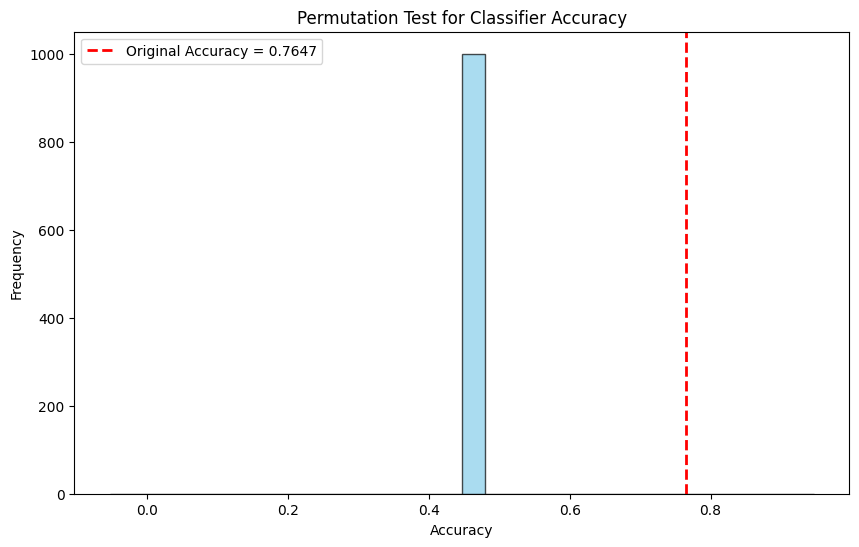

In [ ]:
import matplotlib.pyplot as plt
# Plotting the histogram of permuted accuracies
plt.figure(figsize=(10, 6))
plt.hist(permutation_accuracies, bins=30, color='skyblue', edgecolor='black', alpha=0.7)
plt.axvline(original_accuracy, color='red', linestyle='--', linewidth=2, label=f'Original Accuracy = {original_accuracy:.4f}')

# Add labels and title
plt.xlabel('Accuracy')
plt.ylabel('Frequency')
plt.title('Permutation Test for Classifier Accuracy')
plt.legend()
plt.show()